# Cyberbullying Text Classification
CS6120 Group 10: Pushyanth Damarapati, Sindhya Balasubramanian, Eileen Chang, Priyanka Padinam

### Description
The rise of social media and the recent couple of years of covid-19 lockdown has led to a concerning increase in cyberbullying cases. In 2020, UNICEF even issued a warning in response to the increased cyberbullying compounded by social distancing and increased screen-time. Those who bully others on the internet have the convenience of being able to hide anonymously behind a screen, but the people who are bullied are likely to develop mental-health issues that persist even after the bullying has ceased. Due to social media’s ability to spread information quickly and anonymously, a single person can easily end up being targeted by a large number of people of various demographics. We aim to create a model that will flag harmful tweets and, therefore, protect targets of cyberbullying.

### Dataset
We will be using a kaggle dataset, Cyberbullying Classification, consisting of more than 47,000 tweets labeled according to 6 classes of cyberbullying: Age, Ethnicity, Gender, Religion, Other type of cyberbullying, and Not cyberbullying. Each row of the dataset will have a tweet and its class of cyberbullying. The dataset is meant to be used to create a multi-classification model to predict cyberbullying type, create a binary classification model to flag potentially harmful tweets, and examine words and patterns associated with each type of cyberbullying.

# Importing Dataset and Libraries

In [1]:
!pip install contractions
# !pip install nltk
!pip install autocorrect 
# !pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 13.8 MB/s 
     |████████████████████████████████| 110 kB 85.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 12.4 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=1d2e133909d793848218a6c437d889e98ef16cbf751330114b9768af45127cdf
  Stored in directory: /root/.cache/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [2]:
import string 
import nltk 
import re # regex
from string import punctuation 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
# from autocorrect import Speller # correct spelling
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries 
import matplotlib.pyplot as plt
import seaborn as sns


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler

# #Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import os

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('cyberbullying_tweets.csv')
df['cyberbullying_type'].value_counts()

gender               7973
not_cyberbullying    7945
religion             5490
Name: cyberbullying_type, dtype: int64

**There is not much imbalance between different cyberbulling type. other_cyberbulling will be removed since it may cause a confusion for the models with other cyberbullying class.**

In [5]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

gender               7973
not_cyberbullying    7945
religion             5490
Name: cyberbullying_type, dtype: int64

# 1. Data Preprocessing

In [6]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [8]:
# Checking 10 samples
df.sample(10)

,text,sentiment
7003,RT @PattyArquette: Don't talk to me about priv...,not_cyberbullying
12082,RT @ChrisWarcraft: @freebsdgirl,gender
5235,Cannot headdesk hard enough.,not_cyberbullying
17227,“Extremism is so easy when you go far enough t...,religion
18864,Both idiots are trying hard to defame India ov...,religion
16470,Who hates us man you live in your social media...,religion
16952,Simple truth if Jesus Christ ran for president...,religion
6801,Monday tests are brutal. BRUTAL. They should b...,not_cyberbullying
6808,"Starve a bully, feed your soul.. STAND #GRAND!...",not_cyberbullying
12831,"@DrJoanBeckwith So, no issue with her doing th...",gender


In [59]:
df = df.dropna()
df.head()

,text,sentiment,type_bullying
0,word katandandre food crapilicious mkr,not_cyberbullying,1
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,1
2,xochitlsuckkks classy whore red velvet cupcake,not_cyberbullying,1
3,jasongio meh p thanks head concerned another a...,not_cyberbullying,1
4,rudhoeenglish isi account pretending kurdish a...,not_cyberbullying,1


In [65]:
df["type_bullying"].unique()

array([0., 1.], dtype=float32)

In [95]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(df["sentiment"])

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')
sw_eng = stopwords.words('english')
def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    review_in_lowercase = review.lower()
    no_punctuation = review_in_lowercase.translate(review_in_lowercase.maketrans('', '', string.punctuation))
    no_url = re.sub(r'https?:\/\/.*[\r\n]*','', no_punctuation)
    review_tokens = word_tokenize(no_url)
    no_stopwords_tokens = [token for token in review_tokens if not token in sw_eng]
    porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    review_cleaned = ''
    
    for each in no_stopwords_tokens:
        review_cleaned = review_cleaned + lemmatizer.lemmatize(each) + " "
    
    return review_cleaned

df['text'] = df['text'].apply(lambda x : clean_review(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# 2. Modeling

<b>Modeling to Predict Multi-ClassText Classification for types of Cyber Bullying </b>

Post preprocessing and sampling, the documents will tokenized and converted to an appropriate vector format for model consumption using Bag of Words (countvectorizer)

In [100]:
# TFIDF vectorizer on 
cv = CountVectorizer()

# fit and transform on dataset
X = cv.fit_transform(df.text).toarray()

In [77]:
len(df)

21408

In [102]:
len(X)

21408

In [97]:
len(y)

21408

In [101]:
# Divide data into training and test (80%, 20% respectively)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

In [83]:
print ("Training Data Shape ")
print(len(x_train))
print(len(y_train))
print ("Test Data Shape ")
print(len(x_test))
print(len(y_test))

Training Data Shape 
17126
17126
Test Data Shape 
4282
4282


In [103]:
# Padding sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_size = len(max(x_train,key=lambda x_train:len(x_train)))
x_train = pad_sequences(x_train, maxlen=max_size, padding='post')

The CNN and GCN model will be experimented with to accomplish text classification. Below is the CNN implementation with different regularization and dropout layers

In [27]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Convolution1D
from keras.optimizers import SGD 
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(31)

In [104]:
X = np.expand_dims(x_train, axis=-1)

model = Sequential()

model.add(layers.Embedding(len(X), 100, input_length=max_size))

model.add(Convolution1D(filters=32, kernel_size=8, activation='relu'))

model.add(layers.Flatten())    

model.add(layers.Dense(128, activation=activations.relu))

model.add(Dropout(0.5))

model.add(layers.Dense(32, activation=activations.relu, kernel_regularizer=l2()))

model.add(Dropout(0.5))

model.add(layers.Dense(units=3, activation='sigmoid'))

model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

In [105]:
history = model.fit(x_train, to_categorical(y_train, 3), batch_size = 8, epochs = 10, verbose = 2, shuffle = True, validation_split=0.1);

Epoch 1/10
1927/1927 - 76s - loss: 1.1874 - auc: 0.5631 - accuracy: 0.3757 - val_loss: 1.0092 - val_auc: 0.8102 - val_accuracy: 0.6025 - 76s/epoch - 40ms/step
Epoch 2/10
1927/1927 - 75s - loss: 0.4278 - auc: 0.9452 - accuracy: 0.8723 - val_loss: 0.2817 - val_auc: 0.9824 - val_accuracy: 0.9089 - 75s/epoch - 39ms/step
Epoch 3/10
1927/1927 - 75s - loss: 0.2350 - auc: 0.9714 - accuracy: 0.9296 - val_loss: 0.2708 - val_auc: 0.9828 - val_accuracy: 0.9095 - 75s/epoch - 39ms/step
Epoch 4/10
1927/1927 - 75s - loss: 0.1674 - auc: 0.9805 - accuracy: 0.9526 - val_loss: 0.2915 - val_auc: 0.9825 - val_accuracy: 0.8990 - 75s/epoch - 39ms/step
Epoch 5/10
1927/1927 - 75s - loss: 0.1380 - auc: 0.9851 - accuracy: 0.9652 - val_loss: 0.3209 - val_auc: 0.9827 - val_accuracy: 0.9072 - 75s/epoch - 39ms/step
Epoch 6/10
1927/1927 - 75s - loss: 0.1080 - auc: 0.9886 - accuracy: 0.9744 - val_loss: 0.3922 - val_auc: 0.9803 - val_accuracy: 0.8990 - 75s/epoch - 39ms/step
Epoch 7/10
1927/1927 - 75s - loss: 0.0942 - au

In [107]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

print(history.history.keys())
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_auc = history.history['auc']
val_auc = history.history['val_auc']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

dict_keys(['loss', 'auc', 'accuracy', 'val_loss', 'val_auc', 'val_accuracy'])


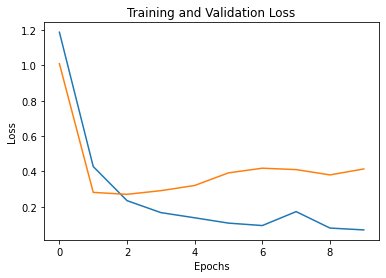

In [108]:
# Plot and label the training and validation loss values
plt.plot(list(range(0,10)), train_loss, label='Training Loss')
plt.plot(list(range(0,10)), val_loss, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plot
plt.show()

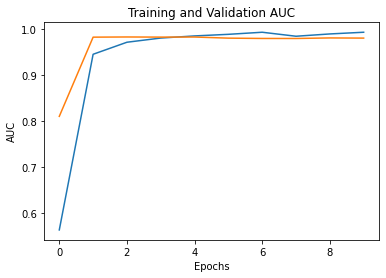

In [109]:
# Plot and label the training and validation AUC values
plt.plot(list(range(0,10)), train_auc, label='Training AUC')
plt.plot(list(range(0,10)), val_auc, label='Validation AUC')
 
# Add in a title and axes labels
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
 
# Display the plot
plt.show()

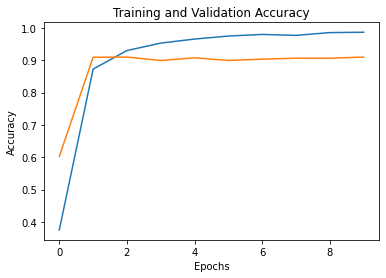

In [110]:
# Plot and label the training and validation accuracy values
plt.plot(list(range(0,10)), train_acc, label='Training Accuracy')
plt.plot(list(range(0,10)), val_acc, label='Validation Accuracy')
 
# Add in a title and axes labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the plot
plt.show()